In [ ]:
from instruments_recognition.importing_data import *
from instruments_recognition.plotting import *

%pylab inline

In [2]:
### IMPORTING SYNTHETIC SINUSOIDS calls

        
algunos = [gimme_sinusoids_noise(500,[.8,.4,.8,.8,.6,.5,.1,.1]),
          gimme_sinusoids(400,[.5,.3,.4,.5,.6,.7,.1,.1])]
namos = ['500','400']

# more global variables
ex_transformed, freq_label = list(zip(*map(transform_floats, algunos)))
names_and_graphs = list(zip(namos, ex_transformed, freq_label))



#plt.plot(ex_transformed[0])
#plt.show()


In [ ]:
### IMPORTING DATA calls


# global variables
# directory with data
#datadirectory = "./samples/sonatina_symphonic_orchestra/Samples/Flute/"
datadirectory = "./samples/flute/philharmonia/LA4/"

# maximum of examples
max_ex = 5

# channels
# TODO: do not hardcode this!
channels = 1

# file names
ex_wav = glob.glob(datadirectory + '*.wav')[:max_ex]

# TODO: a human-readble version of ex_wav
# ex_names = 


# more global variables
ex_transformed, freq_label = list(zip(*map(lambda e : import_convert_transform_release(e,channels), ex_wav)))
names_and_graphs = list(zip(ex_wav, ex_transformed, freq_label))

size of cqt: 10000


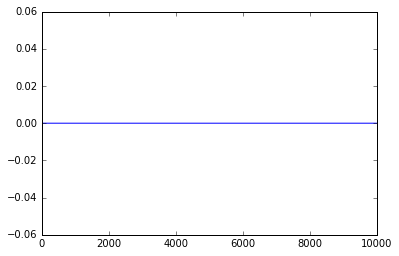

In [11]:
### Constant Q transform


ex_floats = list(map(lambda e : import_convert_release(e,channels), ex_wav))


# Constant Q Transform
def cqt(frame):
    """
    Compute the Constant Q Transform (CQT)
    """
    N = len(frame)
    print("size of cqt: " + str(N))
    y = array(zeros(N))
    a = sqrt(2 / float(N))
    for k in range(N):
         for n in range(N):
            y[k] += frame[n] * cos(pi * (2 * n + 1) * k / float(2 * N))

            if k == 0:
                y[k] = y[k] * sqrt(1 / float(N))
            else:
                y[k] = y[k] * a
    return y


signal = ex_floats[0]

fouriel = abs(np.fft.rfft(signal))
cqtr = cqt(signal[:10000])


plt.plot(cqtr)
plt.show()

In [8]:
### FINDING HARMONICS calls

#harmonic_volumes_every_example = [ harmonics_frequency_volumes(ex_tr, freq_lbl) for ex_name , ex_tr, freq_lbl in names_and_graphs ]
#harmonic_number_volumes_every_example = [ cast_harmonics(f,v) for f,v in harmonic_volumes_every_example ]
harmonic_number_volumes_every_example = [ harmonics_energy(ex_tr, freq_lbl) for ex_name , ex_tr, freq_lbl in names_and_graphs ]


the tonic is: 440.053648069
the tonic is: 438.870708155
the tonic is: 432.956008584
the tonic is: 444.785407725
the tonic is: 441.236587983


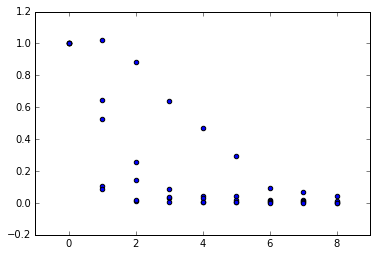

In [4]:
### PLOTTING calls

# get data
#names_and_graphs_and_harm = zip(names_and_graphs, harmonic_volumes_every_example)
names_and_graphs_and_harm_number = list(zip(names_and_graphs, harmonic_number_volumes_every_example))

# plot

minfreq_plot = 60
maxfreq_plot = 4000

plotharmonics_nc(names_and_graphs_and_harm_number)
#plotharmonics(names_and_graphs_and_harm_number)
#plotharmonics2(names_and_graphs_and_harm_number)
#plotspec_and_harmonics(names_and_graphs_and_harm_number)

#plt.legend(loc='upper right')
#plt.yscale('log')
#plt.xlim([minfreq_plot,maxfreq_plot])
plt.show()

#plt.plot([0,1,2])
#plt.show()